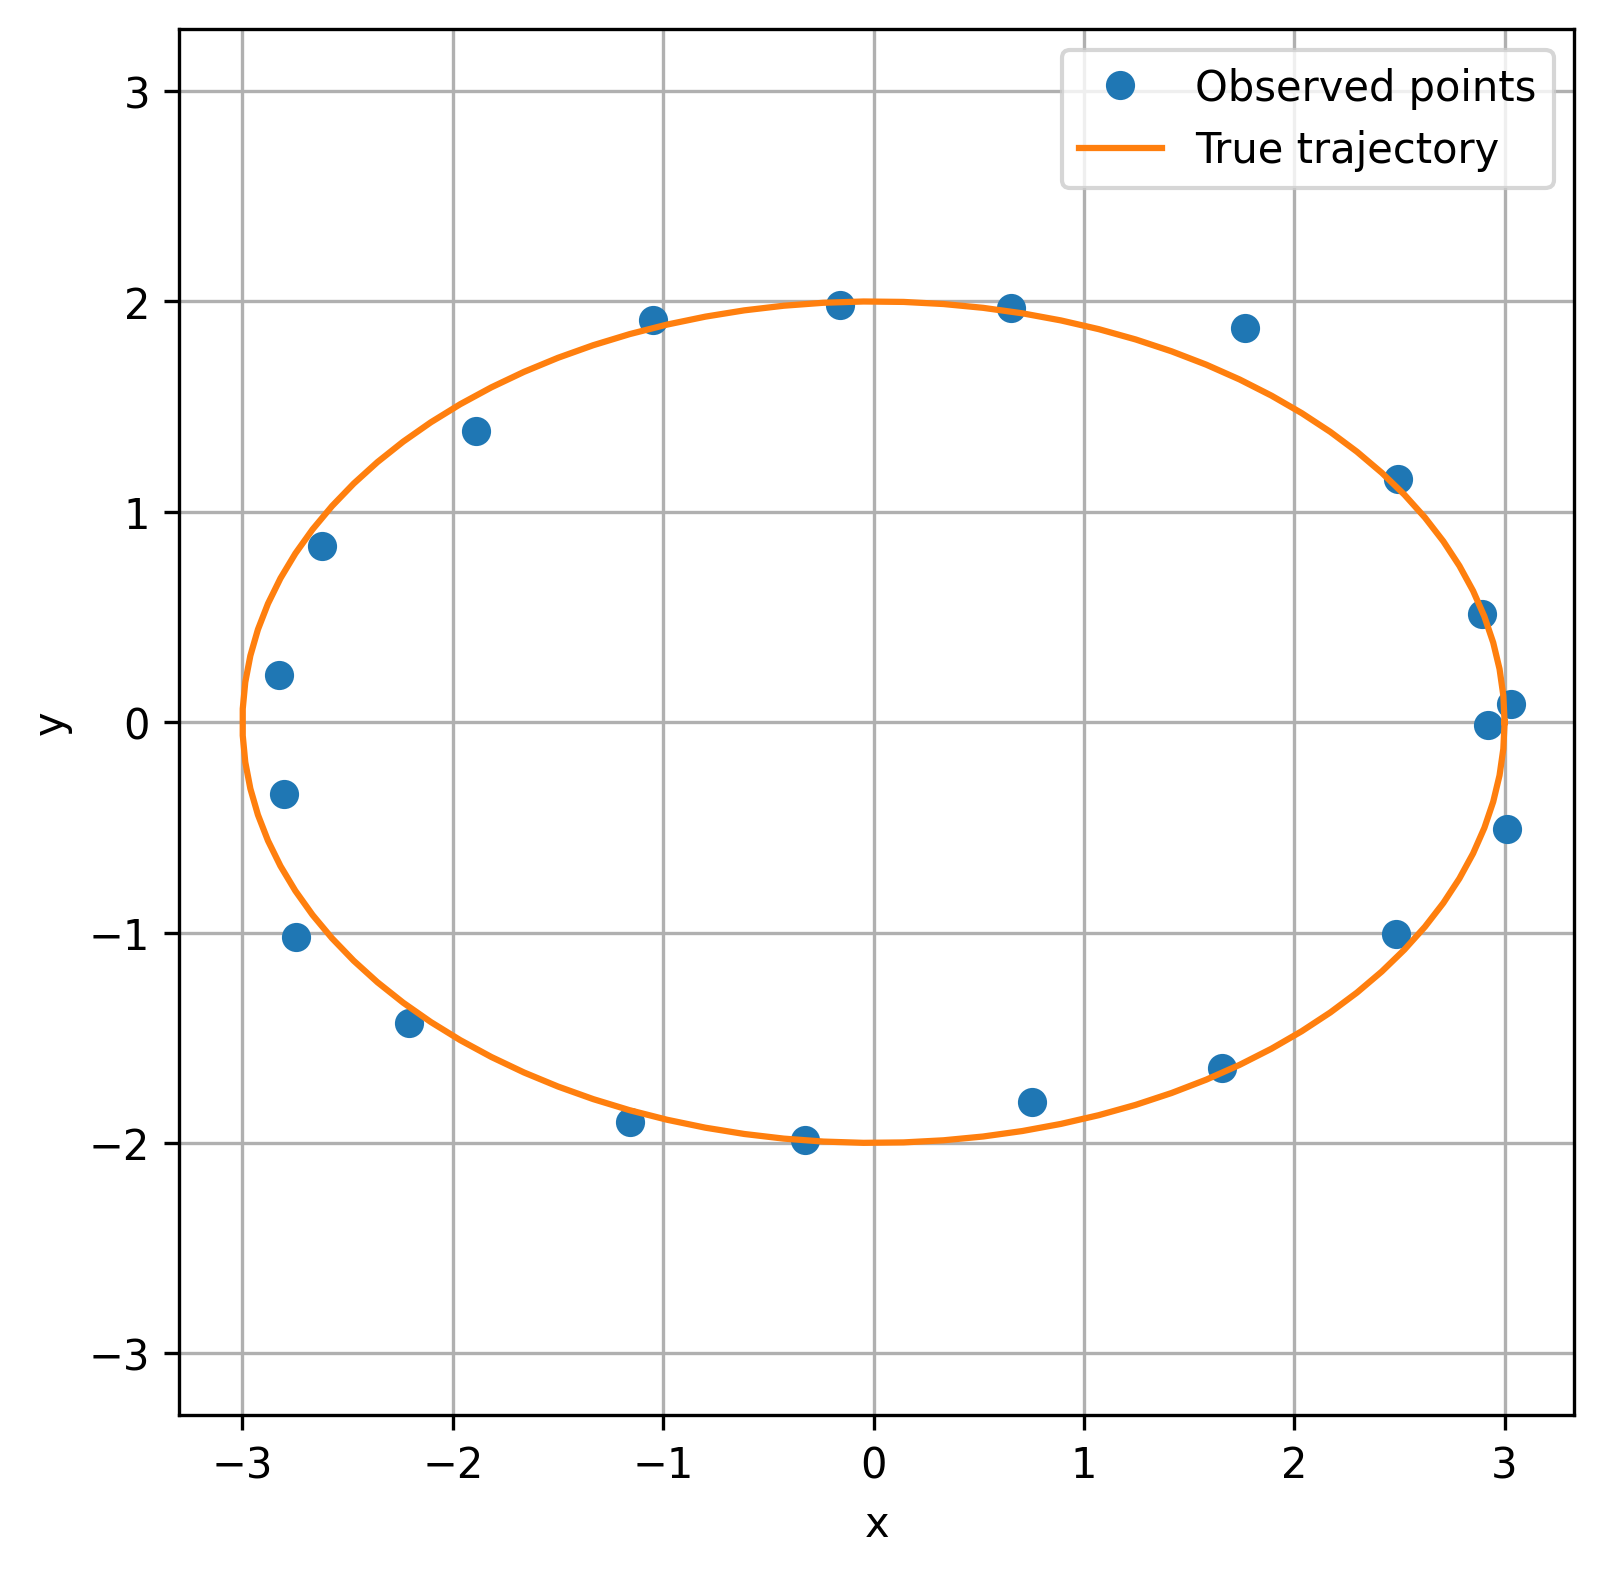

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

true_a = 3
true_b = 2

# 관측 데이터 생성
n_obs = 20
theta = np.linspace(0, 2*np.pi, n_obs)
x_obs = true_a * np.cos(theta) + np.random.normal(0, 0.1, n_obs)
y_obs = true_b * np.sin(theta) + np.random.normal(0, 0.1, n_obs)
# 랜덤한 관측 지점 생성

# 추정된 타원 궤도 그리기 
theta_plot = np.linspace(0, 2*np.pi, 100)
x_true_plot = true_a * np.cos(theta_plot)
y_true_plot = true_b * np.sin(theta_plot)

plt.figure(figsize=(6, 6), dpi=300)
plt.plot(x_obs, y_obs, 'o', label='Observed points')
plt.plot(x_true_plot, y_true_plot, '-', label='True trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

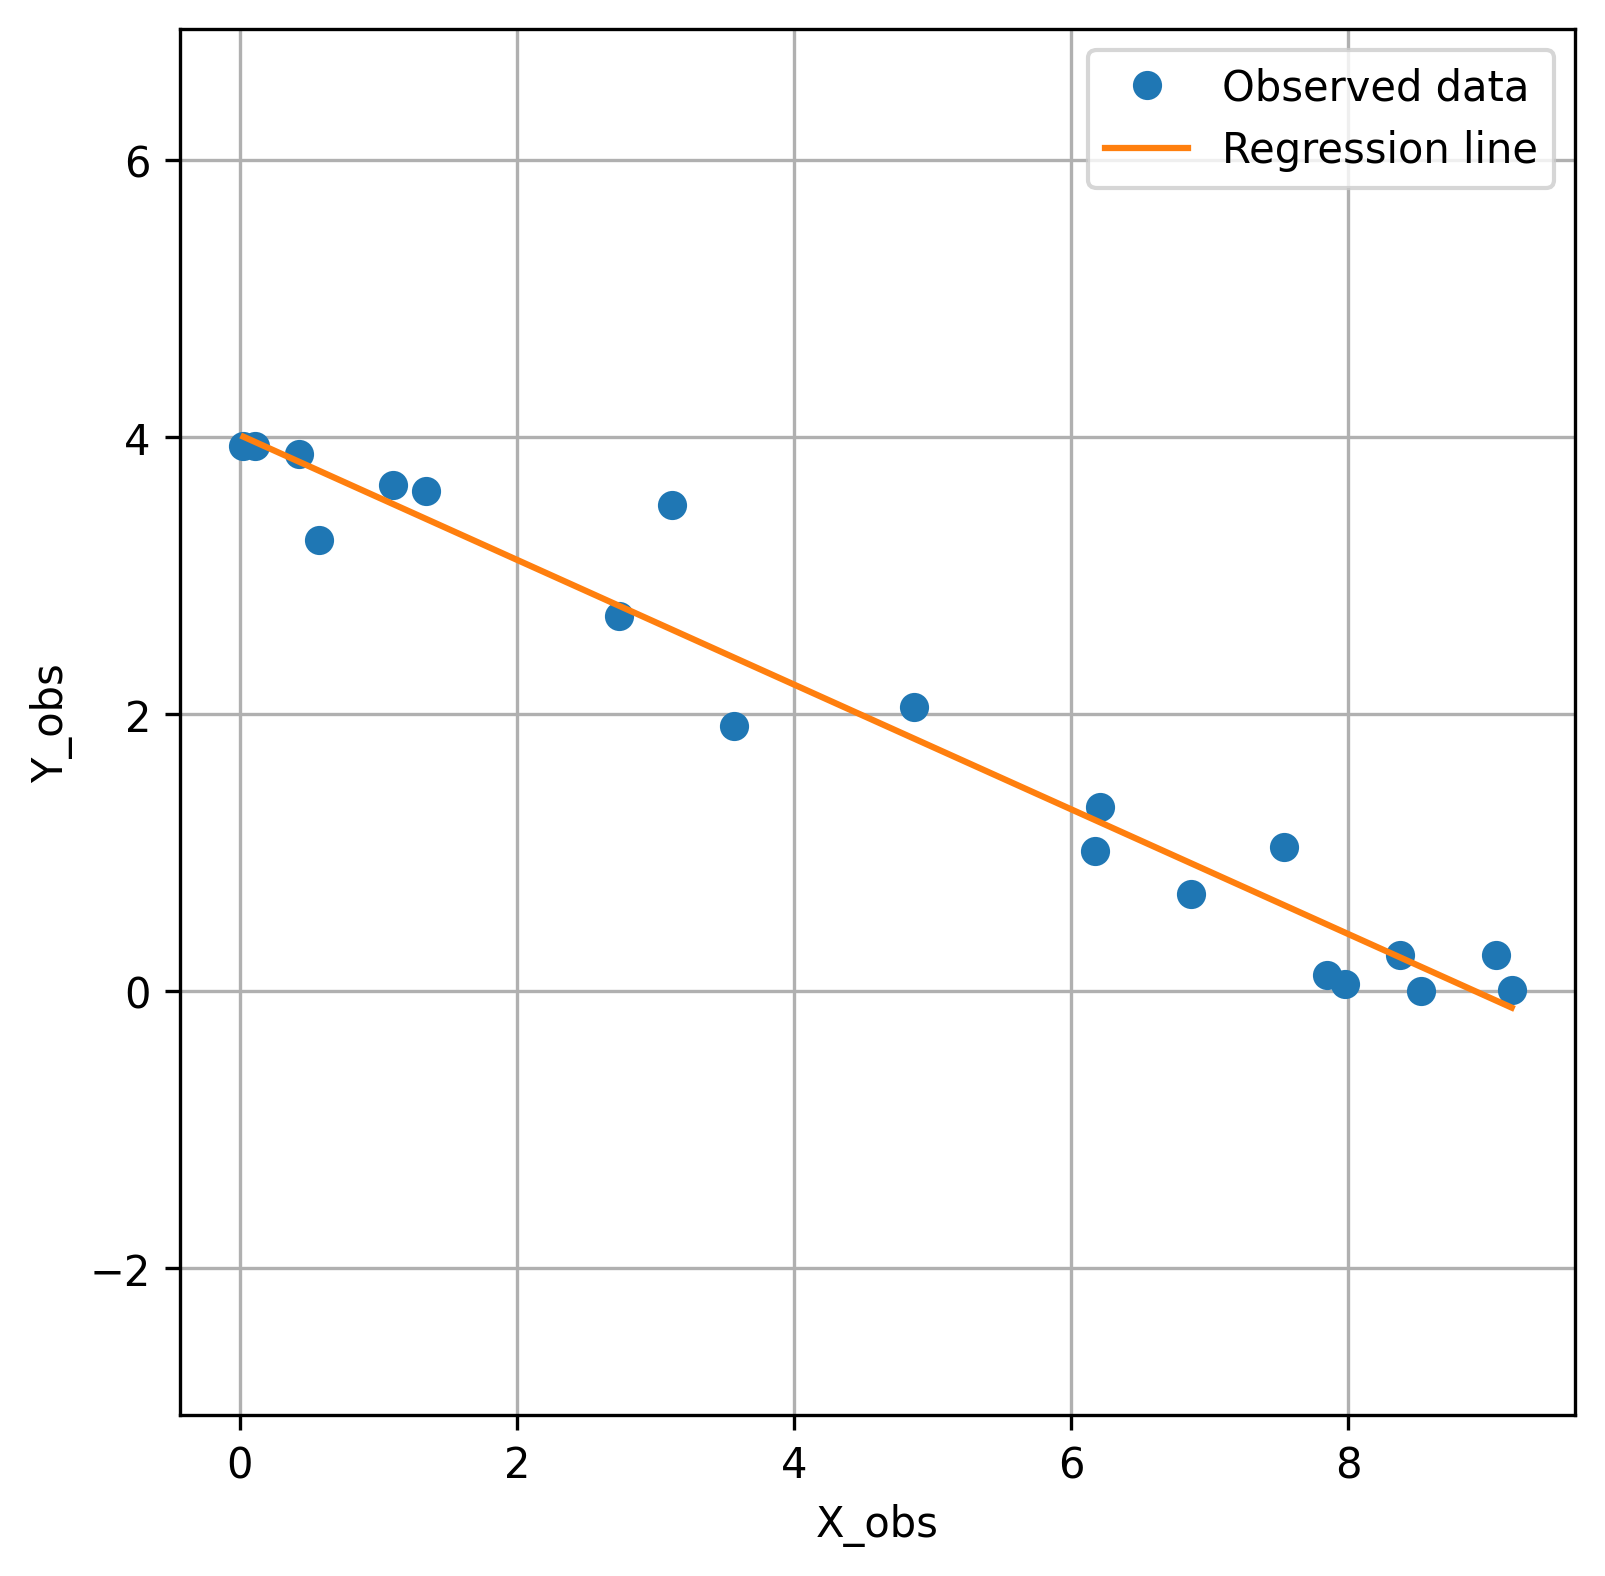

In [7]:
# 선형 방정식으로 변환 
X_obs = x_obs**2 
Y_obs = y_obs**2

# 최소제곱법을 이용한 매개변수 추정
A = np.vstack([X_obs, np.ones(n_obs)]).T
# 기울기 (=a), 절편값 (=b)
m, c = np.linalg.lstsq(A, Y_obs, rcond=None)[0]

plt.figure(figsize=(6, 6), dpi=300)
plt.plot(X_obs, Y_obs, 'o', label='Observed data')
plt.plot(np.linspace(min(X_obs), max(X_obs), 10), 
        m*np.linspace(min(X_obs), max(X_obs), 10) + c, 
        '-', label='Regression line')
plt.xlabel('X_obs')
plt.ylabel('Y_obs')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

In [8]:
# 추정된 매개변수로 타원 궤도 계산
# Y_obs = m * X_obs + c
# (y_obs ** 2) = m * (x_obs ** 2) + c
# 1/c * (y_obs ** 2) = m/c * (x_obs ** 2) + 1
# (-m/c) * (x_obs ** s) + (1/c) * (y_obs ** 2) = 1

obs_a = np.sqrt(abs(c / m))
obs_b = np.sqrt(c)

print(f"실제 장반경 (a): {true_a:.3f}, 추정 장반경 (a): {obs_a:.3f}")
print(f"실제 단반경 (b): {true_b:.3f}, 추정 단반경 (a): {obs_b:.3f}")

실제 장반경 (a): 3.000, 추정 장반경 (a): 2.986
실제 단반경 (b): 2.000, 추정 단반경 (a): 2.004


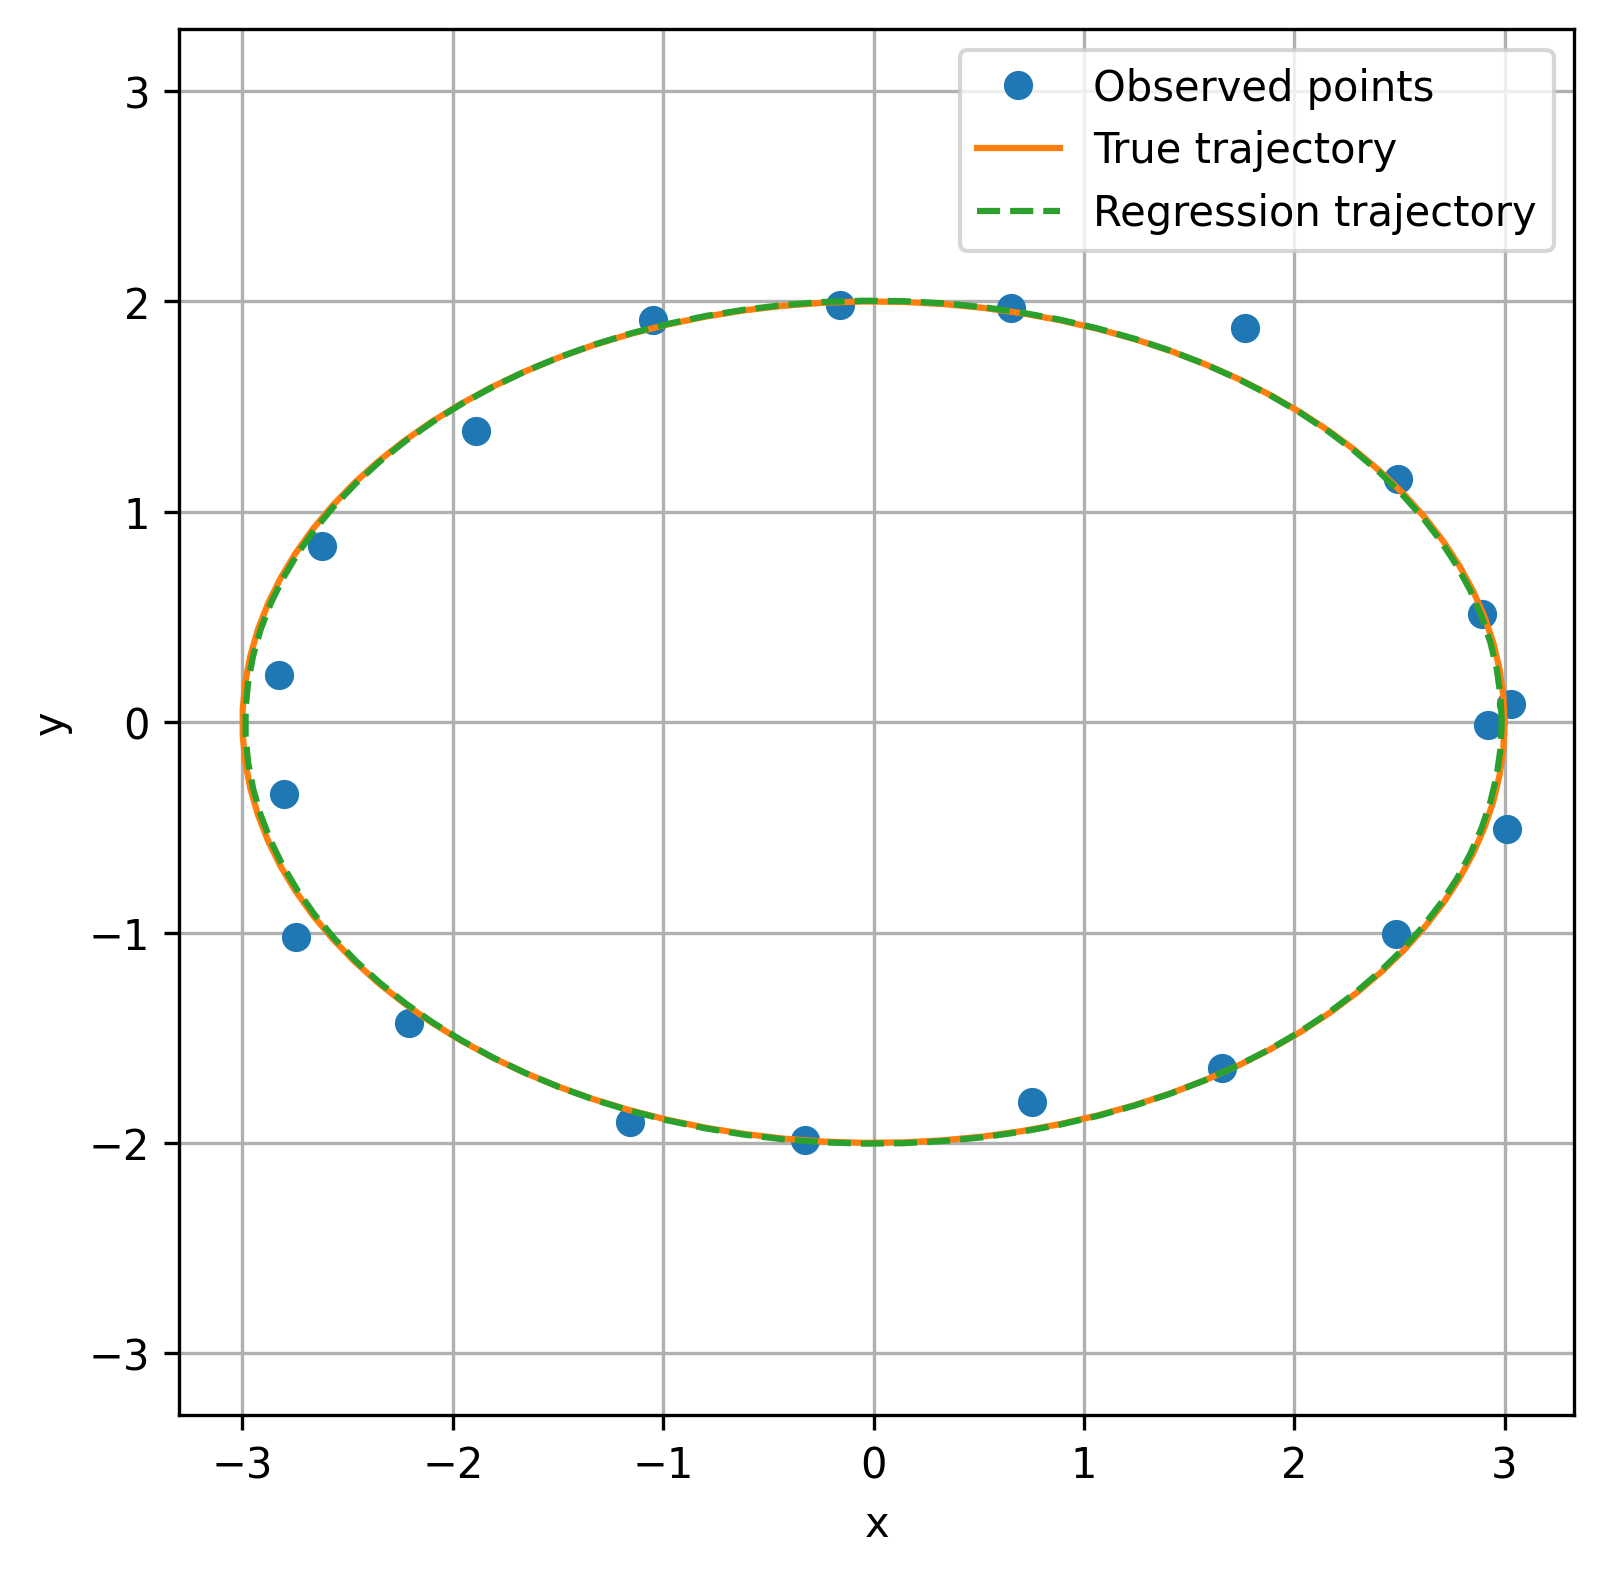

In [12]:
# 추정치를 기반으로한 궤도 시각화 
theta_plot = np.linspace(0, 2*np.pi, 100)
x_obs_plot = obs_a * np.cos(theta_plot)
y_obs_plot = obs_b * np.sin(theta_plot)

plt.figure(figsize=(6, 6), dpi=300)
plt.plot(x_obs, y_obs, 'o', label='Observed points')
plt.plot(x_true_plot, y_true_plot, '-', label='True trajectory')
plt.plot(x_obs_plot, y_obs_plot, '--', label='Regression trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()